##  *Statistics coded:* Quarterly national accounts - GDP and employment

Prepared by [**Hatem Alharazin**](hatemjamil.89@gmail.com) (EMOS).

This notebook aims at illustrating the Statistics Explained article on [Quarterly national accounts](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Quarterly_national_accounts_-_GDP_and_employment#Data_sources).

## Setting Packages up

In [3]:
#install.packages("restatapi")
library(restatapi)
library(ggplot2)
library(tseries)
library(readxl)
#library(tidyr)
#library(dplyr)
#library(plotly)

## GDP and Employment growth rate

In [24]:
assign("dmethod","curl",envir=.restatapi_env) 
get_eurostat_dsd("namq_10_gdp",verbose=TRUE)
#assign("dmethod","auto",envir=.restatapi_env) 
#get_eurostat_dsd("namq_10_gdp",verbose=TRUE)
#assign("dmethod","wininet",envir=.restatapi_env) 
#get_eurostat_dsd("namq_10_gdp",verbose=TRUE)


concept,code,name
<chr>,<chr>,<chr>
FREQ,D,Daily
FREQ,W,Weekly
FREQ,Q,Quarterly
FREQ,A,Annual
FREQ,S,Semi-annual
FREQ,M,Monthly
FREQ,H,Half-year
UNIT,CLV_I15,"Chain linked volumes, index 2015=100"
UNIT,CLV_I10,"Chain linked volumes, index 2010=100"


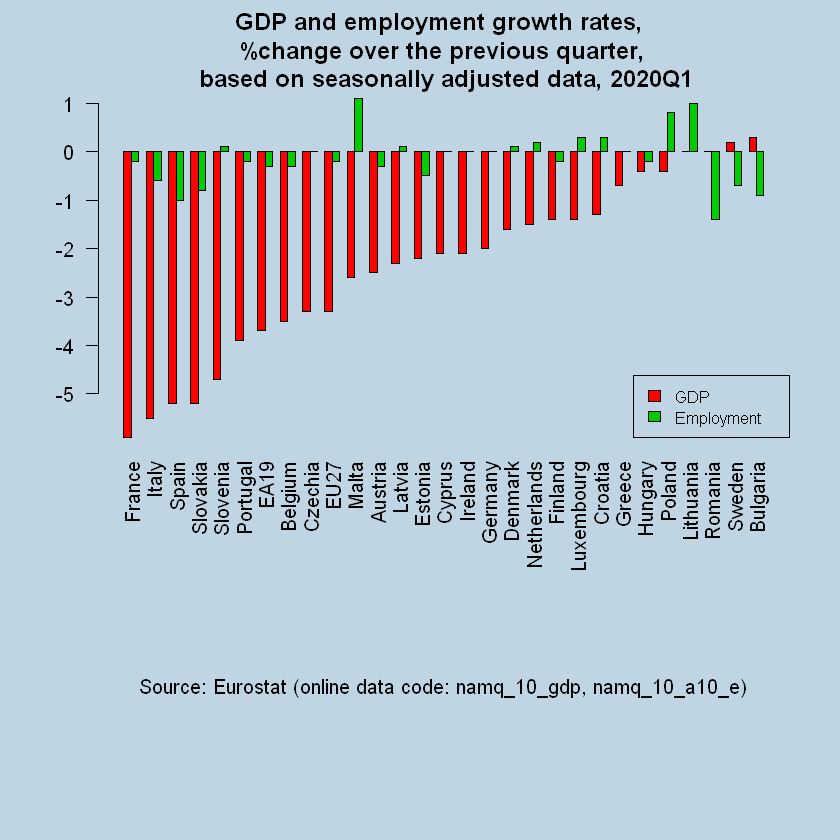

In [26]:
geo_code <- c("EA19","EU27_2020","FR","IT","ES","SK","SI","PT","EE","BE","CZ","LV","LU",
              "AT","MT","DE","DK","FI","EL","NL","CY","HR","HU","PL","LT","SE","BG","RO","IE")

dt_GDP <- get_eurostat_data("namq_10_gdp", filters=list(s_adj=c("SCA","SA"), UNIT="CLV_PCH_PRE",
                            na_item="B1GQ", GEO=geo_code), date_filter="2020:2020-03",
                            select_freq="Q", label=TRUE) 
dt_EMP <- get_eurostat_data("namq_10_a10_e", filters=list(s_adj=c("SCA","SA"), UNIT="PCH_PRE_PER",
                            na_item="EMP_DC", GEO=geo_code, nace_r2 = "TOTAL"),date_filter="2020:2020-03",
                            select_freq="Q", label=TRUE)

dt1 <- merge(dt_GDP[,c(4,6)], dt_EMP[,c(5,7)], by = "geo")
dt1[c(6,8,12),1] <- c("Germany","EA19","EU27")
dt1 <- as.matrix(dt1[,-1], rownames = dt1$geo)
dt1 <- dt1[order(dt1[,1]),]
dt2 <- rbind(dt1[c(8,11),],0,dt1[c(-8-11),])


nf <- layout(matrix(c(1,2),ncol=1, byrow=TRUE), widths=c(6,6), heights=c(2,1))
par(bg = '#BFD5E3')

barplot(t(dt1), las = 2, beside = T, col = c(2,3), main = "GDP and employment growth rates, \n %change over the previous quarter, \n based on seasonally adjusted data, 2020Q1")
legend("bottomright", legend =c("GDP","Employment"), fill = c(2,3), box.lty = 1, cex = 0.8)

plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
text(x = 0.5, y = 0.5, paste("Source: Eurostat (online data code: namq_10_gdp, namq_10_a10_e)"), cex = 1, col = "black", adj=0.5)



# Quarterly GDP growth


In [27]:
# Read the data
dt <-get_eurostat_data("namq_10_gdp", filters=list(currency="MIO_EUR",
                                                partner="EXT_EU28", geo=c("EU28"),
                                                stk_flow="BAL"), date_filter="2007:2020",
                                                select_freq="Q", label=TRUE, name=FALSE, ignore.case=TRUE)


#GDP_EU27_EA19 <- read.csv("~/Eurostatdataset/namq_10_gdp_1_Data.csv") # GDP of EU27 and EA19 2007Q4-2020Q2
#GDP_Unit_Stat <- read.csv("~/Eurostatdataset/naidq_10_gdp_1_Data.csv")# GDP of United States 2007Q4-2020Q2
#GDP_df <- data.frame(GDP_EU27_EA19[,-1], GDP_Unit_Stat)               # Merge GDP files in a data frame
#GDP_TS <- ts(GDP_df[,-3], start = c(2007, 4), frequency = 4)          # Define data as time series
#GDP_Growth_Rate <- ((GDP_TS-lag(GDP_TS,-1))/lag(GDP_TS,-1))*100       # Calculate the quarterly growth rate
#colnames(GDP_Growth_Rate) <- c("EU27","EA19","United States")         # change the names

#par(bg = 'gray')
#plot(GDP_Growth_Rate[,1], ylim=c(-4,2))
#lines(GDP_Growth_Rate[,2], col=2)
#lines(GDP_Growth_Rate[,3], col=4)

Date_var <- seq(as.Date("2008/1/1"), as.Date("2020/6/1"), by = "quarter")
GDP_Growth_Rate <- data.frame(GDP_Growth_Rate,Date_var)
#GDP_Growth_Rate

No data retrieved for the given filter(s), because the results are too big to download immediately through the REST API. The whole dataset is downloaded through the raw download and the filters are applied locally.
The file download was not successful. Try again later.


ERROR: Error in data.table::setnames(raw_data, colnames(raw_data), toupper(colnames(raw_data))): x is not a data.table or data.frame


In [13]:
Stacked_data <- data.frame(GDP_Growth_Rate[4], stack(GDP_Growth_Rate[1:3]))

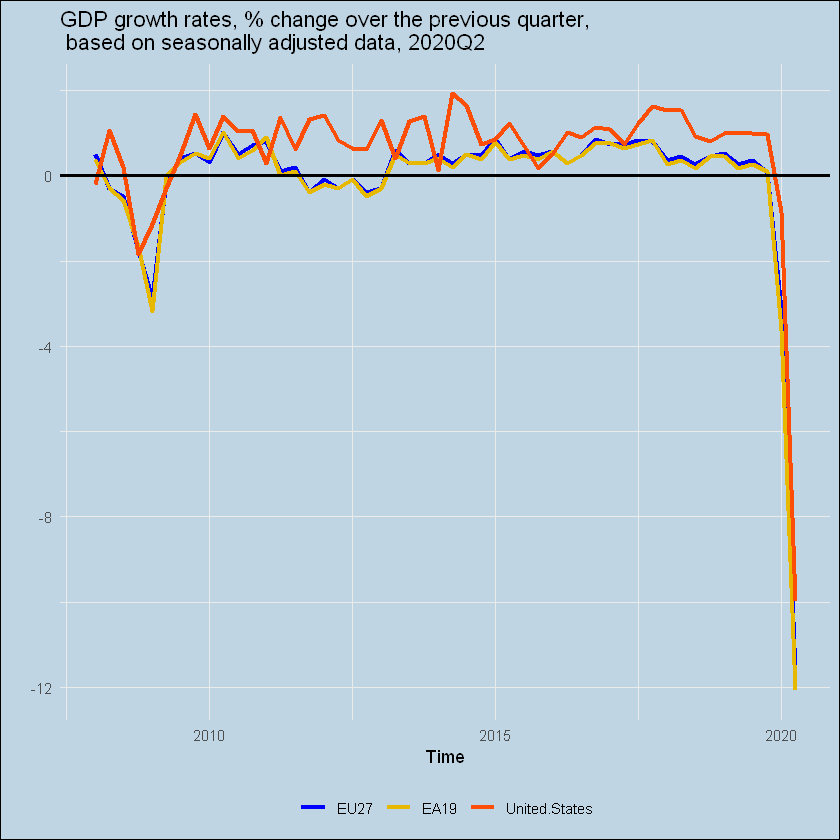

In [62]:
# Multiple line plot
p <- ggplot(Stacked_data, aes(x = Date_var, y = values)) + 
  geom_line(aes(color = ind), size = 1.3) +
  scale_color_manual(values = c("blue", "#E7B800", "#FC4E07")) +
  theme_minimal()
p <- p + theme(legend.position="bottom")+ 
         theme(legend.title = element_blank())

# Add horizontal line at y = 0
p <- p + geom_hline(yintercept=0, color = "black", size=1)
p <- p + theme(plot.background = element_rect(fill = "#BFD5E3"))

p + ggtitle("GDP growth rates, % change over the previous quarter,\n based on seasonally adjusted data, 2020Q2") +
  xlab("Time") + ylab(" ")

Don't forget to explain what you are doing...

# GDP growth by Member State

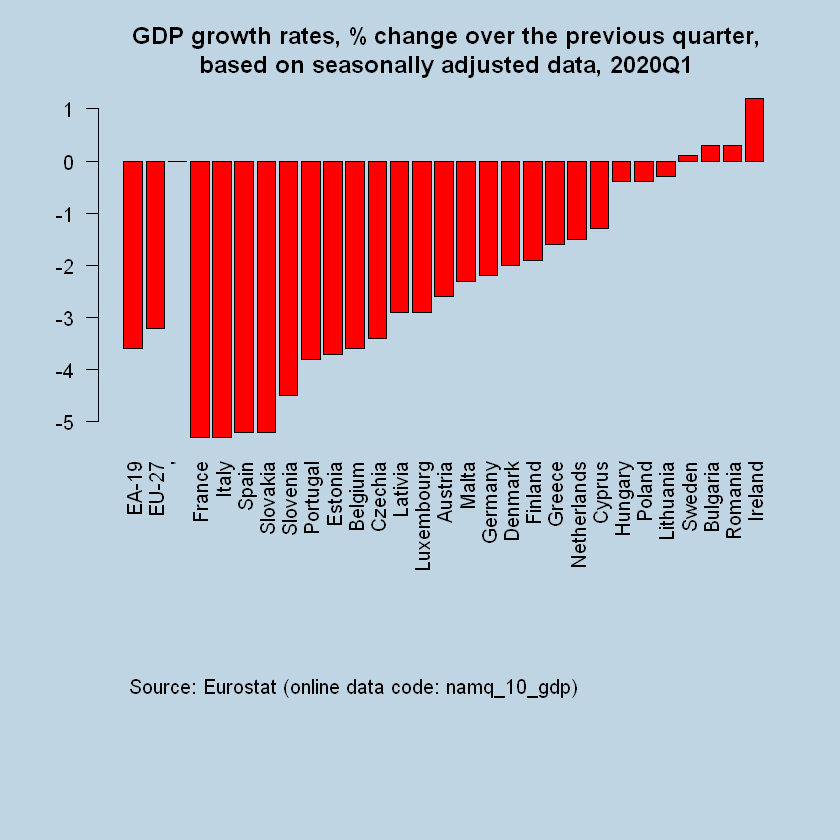

In [74]:
library(magick)
# logo <- image_read("https://ec.europa.eu/eurostat/statistics-explained/images/0/09/Logo_RGB-POS.png")
GR_Data_GDP <- as.matrix(GR_Data[1,1:ncol(GR_Data)])
par(bg = '#BFD5E3')
nf <- layout(matrix(c(1,2),ncol=1, byrow=TRUE), widths=c(6,6), heights=c(2,1))
#par(pin=c(6,3))
barplot(t(GR_Data_GDP), las = 2, col = 2, main = " GDP growth rates, % change over the previous quarter,\n based on seasonally adjusted data, 2020Q1")
plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
text(x = 0.5, y = 0.5, paste("Source: Eurostat (online data code: namq_10_gdp)"), cex = 1, col = "black", adj=0.7)


# GDP components and contributions to growth

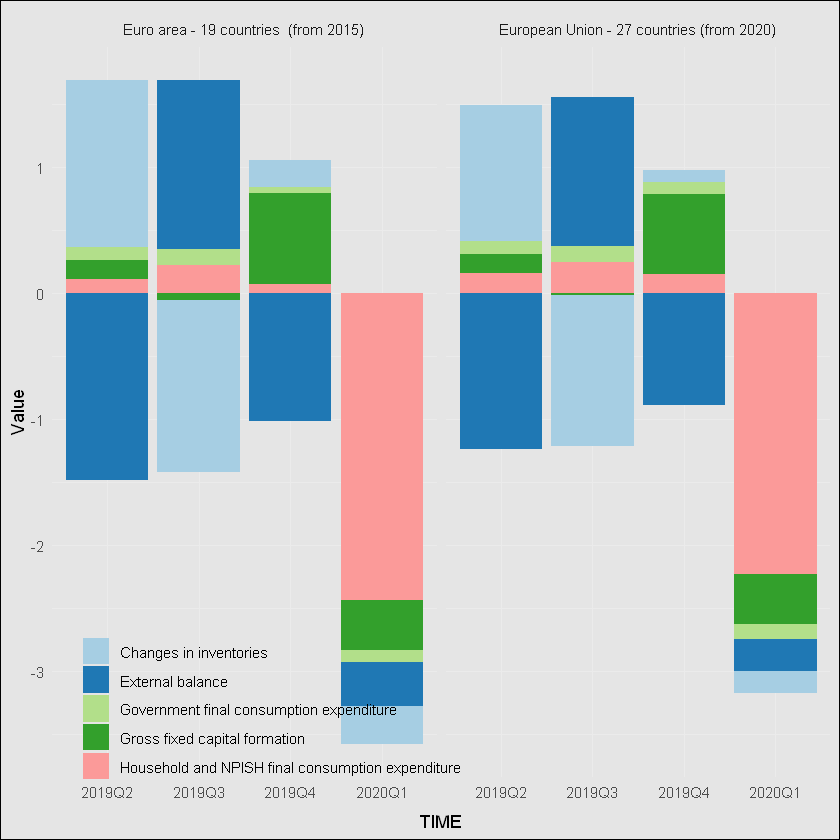

In [59]:
GDP_comp <- read.csv("~/Eurostatdataset/Figure 3/namq_10_gdp_1_Data.csv") # EMP of EU27 and EA19 2007Q4-2020Q2

GDP_GR <- GDP_comp[which(GDP_comp$NA_ITEM == "Gross domestic product at market prices"), ]
GDP_comp_EU27 <- GDP_comp[which(GDP_comp$NA_ITEM != "Gross domestic product at market prices"), ]

p <- ggplot(data=GDP_comp_EU27, aes(x=TIME, y=Value, fill=NA_ITEM)) +
  geom_bar(stat="identity")+
  scale_fill_brewer(palette="Paired")+
  theme_minimal()
p <- p + theme(legend.position=c(0.3, 0.1))+ 
         theme(legend.title = element_blank())
p <- p + facet_grid(. ~ GEO)

#p <- p + geom_hline(yintercept=0, color = "black", size=1)
p + theme(plot.background = element_rect(fill = "gray90"))

# Quarterly employment growth

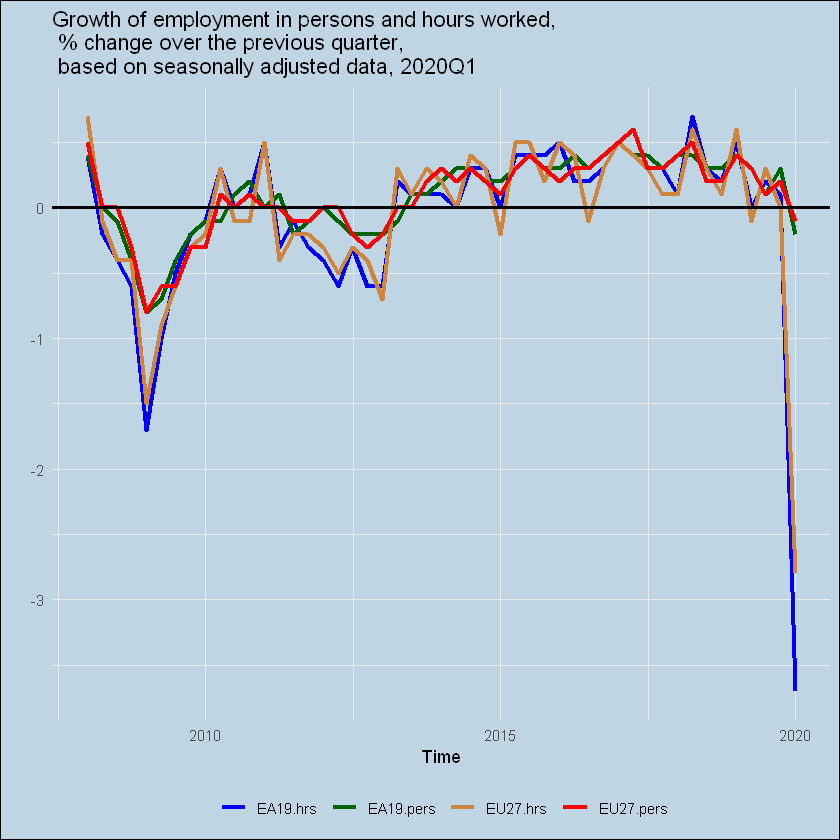

In [35]:
EMP_EU27_EA19 <- read.csv("~/Eurostatdataset/namq_10_a10_e_1_Data.csv") # EMP of EU27 and EA19 2007Q4-2020Q2
EMP_EU27_EA19$Series[EMP_EU27_EA19$GEO == "European Union - 27 countries (from 2020)" & EMP_EU27_EA19$UNIT == "Percentage change on previous period (based on persons)"] <- "EU27 pers"
EMP_EU27_EA19$Series[EMP_EU27_EA19$GEO == "European Union - 27 countries (from 2020)" & EMP_EU27_EA19$UNIT == "Percentage change on previous period (based on hours worked)"] <- "EU27 hrs"
EMP_EU27_EA19$Series[EMP_EU27_EA19$GEO == "Euro area - 19 countries  (from 2015)" & EMP_EU27_EA19$UNIT == "Percentage change on previous period (based on persons)"] <- "EA19 pers"
EMP_EU27_EA19$Series[EMP_EU27_EA19$GEO == "Euro area - 19 countries  (from 2015)" & EMP_EU27_EA19$UNIT == "Percentage change on previous period (based on hours worked)"] <- "EA19 hrs"
EMP_EU27_EA19 <- EMP_EU27_EA19[,-c(2,3)]
unstacked_data <- data.frame(unstack(EMP_EU27_EA19[,c(2,3)]))
Date_var <- seq(as.Date("2008/1/1"), as.Date("2020/3/1"), by = "quarter")
unstacked_data <- data.frame(unstacked_data, Date_var)

restacked_data <- data.frame(unstacked_data[5], stack(unstacked_data[1:4]))
# Multiple line plot
p <- ggplot(restacked_data, aes(x = Date_var, y = values)) + 
  geom_line(aes(color = ind), size = 1.3) +
  scale_color_manual(values = c("blue", "darkgreen", "tan3", "red")) +
  theme_minimal()
p <- p + theme(legend.position="bottom")+ 
         theme(legend.title = element_blank())

# Add horizontal line at y = 0
p <- p + geom_hline(yintercept=0, color = "black", size=1)
p <- p + theme(plot.background = element_rect(fill = "#BFD5E3"))

p + ggtitle("Growth of employment in persons and hours worked,\n % change over the previous quarter,\n based on seasonally adjusted data, 2020Q1") +
  xlab("Time") + ylab(" ")


# Employment growth by Member State

# Employment levels

# Labour productivity